# BERT

### Resources   
- https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
- https://searchenterpriseai.techtarget.com/definition/BERT-language-model
- https://www.thepythoncode.com/article/finetuning-bert-using-huggingface-transformers-python
- https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f
- https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b
- https://curiousily.com/posts/multi-label-text-classification-with-bert-and-pytorch-lightning/
- https://towardsdatascience.com/bert-for-dummies-step-by-step-tutorial-fb90890ffe03
- https://neptune.ai/blog/how-to-code-bert-using-pytorch-tutorial
- https://medium.com/analytics-vidhya/text-summarization-using-bert-gpt2-xlnet-5ee80608e961

In [3]:
import pandas as pd
import requests
import numpy as np

In [5]:
req = requests.get('http://ufcstats.com/event-details/335ad945324c3a2e')

In [12]:
df = pd.read_html('http://ufcstats.com/event-details/335ad945324c3a2e')[0]

In [13]:
df

,W/L,Fighter,Kd,Str,Td,Sub,Weight class,Method,Round,Time
0,win,Francis Ngannou Ciryl Gane,0 0,43 63,4 1,0 3,Heavyweight,U-DEC,5,5:00
1,win,Deiveson Figueiredo Brandon Moreno,3 0,86 105,2 1,0 0,Flyweight,U-DEC,5,5:00
2,win,Michel Pereira Andre Fialho,0 0,107 45,1 0,0 0,Welterweight,U-DEC,3,5:00
3,win,Said Nurmagomedov Cody Stamann,0 0,7 1,0 0,1 0,Bantamweight,SUB Guillotine Choke,1,0:47
4,win,Michael Morales Trevin Giles,1 0,26 8,0 1,0 1,Welterweight,KO/TKO Punches,1,4:06
5,win,Victor Henry Raoni Barcelos,0 0,181 134,0 1,0 0,Bantamweight,U-DEC,3,5:00
6,win,Jack Della Maddalena Pete Rodriguez,1 0,43 25,0 0,0 0,Welterweight,KO/TKO Punch,1,2:59
7,win,Tony Gravely Saimon Oliveira,0 0,46 35,11 0,0 4,Bantamweight,U-DEC,3,5:00
8,win,Matt Frevola Genaro Valdez,4 0,60 10,0 0,0 0,Lightweight,KO/TKO Punches,1,3:15
9,win,Vanessa Demopoulos Silvana Gomez Juarez,0 1,4 10,0 0,2 0,Women's Strawweight,SUB Armbar,1,2:25


In [2]:
levels_fyi_data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
levels_df = pd.DataFrame(levels_fyi_data)
levels_df.shape

(62642, 17)

In [3]:
levels_df = levels_df.drop(['cityid', 'dmaid','rowNumber'], axis=1)
levels_df = levels_df.replace("", np.nan)

In [4]:
levels_df['timestamp'] = pd.to_datetime(levels_df['timestamp'])
levels_df[
    ['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']
] = levels_df[
    ['yearsofexperience','basesalary','bonus','stockgrantvalue','totalyearlycompensation','yearsatcompany']
].apply(pd.to_numeric)

In [11]:
levels_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,NaN,160,17,9,NaN,NaN
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,NaN,0,0,0,NaN,NaN
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,NaN,126,0,0,NaN,NaN
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,NaN,92799,55371,23178,NaN,NaN
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,NaN,156335,0,57840,NaN,NaN


In [12]:
fb = levels_df[levels_df['company'].isin(['Facebook', 'Meta'])]

In [31]:
fb[(fb['title'] == 'Data Scientist') & (fb['basesalary'] != 0)][
    ['yearsofexperience', 'basesalary']
].value_counts().reset_index().rename(columns = {0 : 'count'}).sort_values(by = 'basesalary')

,yearsofexperience,basesalary,count
90,3,63,1
124,1,72,1
46,0,78,1
0,3,78,2
147,0,80,1
...,...,...,...
48,10,280,1
83,9,288,1
63,14,294,1
21,7,303,1


<AxesSubplot:>

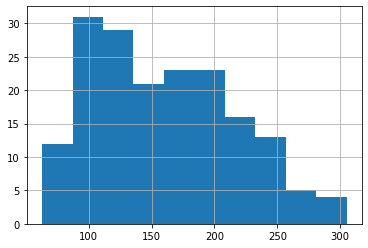

In [21]:
fb[(fb['title'] == 'Data Scientist') & (fb['basesalary'] != 0)].sort_values(by = 'basesalary')['basesalary'].hist()

<AxesSubplot:>

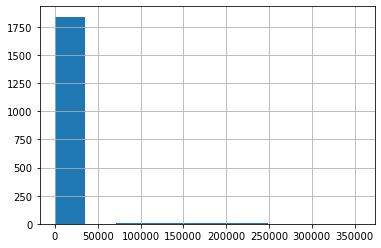

In [22]:
fb[(fb['title'] == 'Software Engineer') & (fb['basesalary'] != 0)].sort_values(by = 'basesalary')['basesalary'].hist()

In [23]:
fb[(fb['title'] == 'Software Engineer') & (fb['basesalary'] != 0)]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails
23,2017-07-21 15:34:53,Facebook,E6,Software Engineer,485280,"San Francisco, CA",5,7,NaN,175950,267130,42200,NaN,NaN
71,2017-09-04 14:17:07,Facebook,E4,Software Engineer,282,"Menlo Park, CA",1,1,NaN,189,79,14,NaN,NaN
116,2017-10-17 22:57:39,Facebook,E6,Software Engineer,3386013,"Seattle, WA",11,5,NaN,208032,3140803,37178,NaN,schloub kliafy waitz mccreaucs snooks swuew ca...
117,2017-10-19 01:31:35,Facebook,E6,Software Engineer,1661,"Menlo Park, CA",12,1,NaN,305,1320,36,NaN,NaN
121,2017-10-21 13:13:16,Facebook,E3,Software Engineer,149665,"San Francisco, CA",0,0,NaN,78123,47530,24012,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62491,2021-08-15 22:17:26,Facebook,IC4,Software Engineer,262,"Menlo Park, CA",7,4,Web Development (Front-End),185,49,28,NaN,ceosts knaop
62492,2021-08-15 22:20:26,Facebook,E5,Software Engineer,502,"Seattle, WA",7,0,Full Stack,293,183,26,Male,thaab spaagy gnuirn yioupp juasly draasly
62523,2021-08-16 09:20:58,Facebook,E5,Software Engineer,464,"Seattle, WA",7,0,Distributed Systems (Back-End),284,146,34,Male,mcmeucs mcleatch riocy twauv schmiengly yienn
62586,2021-08-16 19:14:27,Facebook,E4,Software Engineer,326,"New York, NY",3,2,Distributed Systems (Back-End),221,92,13,Male,rhoish schroub physaently shieg plaesp wiom sh...


In [34]:
levels_df[levels_df['company'] == 'Databricks'].title.unique()

array(['Solution Architect', 'Software Engineer',
       'Software Engineering Manager', 'Technical Program Manager',
       'Marketing'], dtype=object)

In [9]:
list(map(int, str(123)))

[1, 2, 3]

In [10]:
import numpy as np

In [11]:
np.nan / 10

nan

In [14]:
np.mean([5, 4,3,2,1])

3.0

In [17]:
'5'.isdigit()

True

In [19]:
vals = [5, 4, 6,3, 6, 7, '', 'nan', ' ', 54, 3, 41]

In [20]:
nan_list = [np.nan, 'nan', 'NaN', 'null', None, 'unknown', 'missing', 'n/a', '', ' ']
valid_n = [np.int32, np.int64, np.float32, np.float64, int, float]
avg = np.mean([val for val in vals if type(val) in valid_n])

In [21]:
avg

14.333333333333334

In [22]:
[avg if v in nan_list else v for v in vals]

[5,
 4,
 6,
 3,
 6,
 7,
 14.333333333333334,
 14.333333333333334,
 14.333333333333334,
 54,
 3,
 41]

In [25]:
from cmath import *

In [26]:
!pip3 install pygame

     |████████████████████████████████| 8.9 MB 6.5 MB/s eta 0:00:01


In [44]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# img 1 
mat = np.asarray([
    [0,4,0,1],
    [4,0,3,2],
    [0,3,0,5],
    [1,2,5,0]
])

In [32]:
G = nx.convert_matrix.from_numpy_array(mat)

In [33]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 5
Average degree:   2.5000


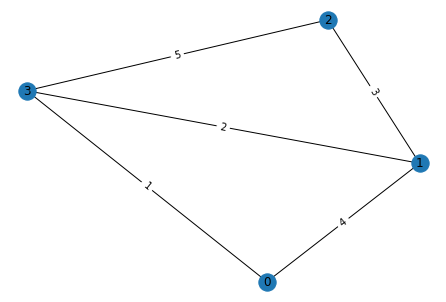

In [45]:
pos=nx.spring_layout(G)
# nx.draw_circular(G, with_labels = True)
nx.draw(G,pos, with_labels = True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, edge_labels = labels, pos = pos)
plt.show()

In [48]:
g = nx.convert_matrix.from_numpy_array(arr, create_using = nx.DiGraph)

In [49]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 4
Average in degree:   2.0000
Average out degree:   2.0000


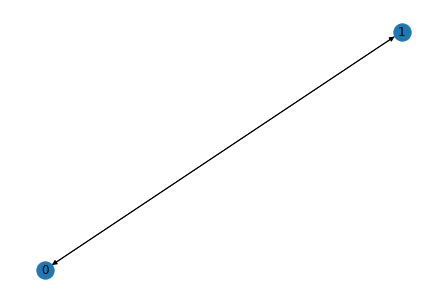

In [50]:
nx.draw(g, with_labels = True)

In [51]:
mat1 = np.array([[0,2,3,0], [2,0,1,1], [3,1,0,0], [0,1,0,0]])
mat2 = np.array([[0,4,5,3], [4,0,1,2], [5,1,0,0], [3,2,0,0]])

In [52]:
mat1@mat2

array([[23,  3,  2,  4],
       [ 8, 11, 10,  6],
       [ 4, 12, 16, 11],
       [ 4,  0,  1,  2]])

In [53]:
mat1.dot(mat2)

array([[23,  3,  2,  4],
       [ 8, 11, 10,  6],
       [ 4, 12, 16, 11],
       [ 4,  0,  1,  2]])

In [54]:
mat1*mat2

array([[ 0,  8, 15,  0],
       [ 8,  0,  1,  2],
       [15,  1,  0,  0],
       [ 0,  2,  0,  0]])

In [55]:
mat1 = np.array([[0,2], [2,0]])
mat2 = np.array([[0,4], [4,0]])

In [56]:
mat1@mat2

array([[8, 0],
       [0, 8]])

In [57]:
mat1*mat2

array([[0, 8],
       [8, 0]])

In [101]:
m_org = np.array(
    [
        [1,4,5,6,8,7,6,5,4,2,3,5],
        [2,3,4,6,2,1,4,4,6,3,2,1],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [0,7,5,7,2,3,4,5,6,4,2,1],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [0,1,2,5,3,5,6,4,3,2,6,2],
        [1,4,5,6,8,7,6,5,4,2,3,5],
        [0,1,2,5,3,5,6,4,3,2,6,2]
    ]
)

def create_subarray(arr, r_idx, c_idx):
    try:
        return arr[np.ix_(r_idx, c_idx)]
    except:
        raise IndexError("Index is out of bounds")

s1 = [1,4,6]
create_subarray(m_org, s1, s1)

array([[3, 2, 4],
       [1, 3, 6],
       [4, 8, 6]])

In [95]:
s1 = [1,4,6]

In [96]:
m_org[np.asarray(s1)[:, None], s1]

array([[3, 2, 4],
       [1, 3, 6],
       [4, 8, 6]])

In [94]:
# kw_data = {
#     'topic' : ['travel' for _ in range(33)],
#     'subtopic' : [
#         'travel', 'africa', 'asia', 'australia oceania', 'caribbean', 'europe', 'india', 'mexico', 'middle east', 'polar', 'south america', 'usa',
#         'within canada', 'bnb', 'hotel', 'motel', 'air plane', 'bus', 'cruise', 'ferry', 'road trip', 'rv', 'adventure', 'beach', 'business', 'day trip',
#         'family vacation', 'honeymoon', 'spa', 'fall', 'spring', 'summer', 'winter'
#     ],
#     'keywords' : [
#         [], [], ['china', 'japan', 'koea', 'thailand'], ['australia', 'oceania'], [], ['france', 'united kingdom', 'italy', 'spain', 'rome', 'germany', 'greece'],
#         ['bombay', 'goa', 'nepal', 'bangladesh'], [], ['united arab emirates', 'dubai', 'iran', 'iraq', 'turkey'], [], ['latin america', 'brazil'],
#         ['united states', 'america'], ['canada', 'banff', 'toronto', 'ontario', 'quebec'], ['air bnb', 'bed breakfast', 'air bb'], [], [], ['airplane'], 
#         ['school bus', 'travel bus', 'bus station', 'train station'], [], [], [], ['recreational vehicle'], [], ['beach house'], ['business trip'], [],
#         ['vacation'], [], [], [], [], [], []
#     ],
#     'gen_model' : ['no' for _ in range(33)]
# }
# kw_df = pd.DataFrame.from_dict(kw_data)

In [1]:
import pandas as pd

In [2]:
kw_df = pd.read_csv('topic_subtopic.csv', converters = {'keywords' : eval})

In [5]:
base_table = 'sub_count'
begin_q = '''with {} as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,'''.format(base_table)

In [6]:
for i,r in kw_df.iterrows():
    sub_t = r['subtopic']
    kw = r['keywords']
    gen_m = r['gen_model']

    if gen_m == 'yes':
        base = '''
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, '{}', '') ) ) / length('{}') ) as "{}_count",
        '''
        begin_q += base.format(sub_t, sub_t, sub_t)
        if len(kw) > 0:
            sub_base = '''      round ( ( length(cleaned_content) - length( replace ( cleaned_content, '{}', '') ) ) / length('{}') ) as "{}_count",
        '''
            for k in kw:
                begin_q += sub_base.format(k, k, k)
begin_q = begin_q.rstrip()[:-1] + '\n'

In [7]:
ref_table = 'sandbox.vpatel_schema.all_articles'
from_q = '''    from {}
), '''
begin_q+=from_q.format(ref_table)

In [52]:
print(begin_q)

with sub_count as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'travel', '') ) ) / length('travel') ) as "travel_count"

    from sandbox.vpatel_schema.all_articles
    ), 


In [27]:
join_table_name = 'join_subtopics'
second_q = '''{} as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,
        '''.format(join_table_name)

In [28]:
for i,r in kw_df.iterrows():
    sub_t = r['subtopic']
    kw = r['keywords']
    gen_m = r['gen_model']
    if gen_m == 'yes':
        base_q = '{},'
        if len(kw) > 0:
            words = [sub_t] + kw
            sub_q = '(' + ' + '.join(['''"{}_count"'''.format(x) for x in words]) + ')' + ''' as "{}_count", 
        '''.format(sub_t)
            second_q += sub_q
        else:
            sub_q = ''' "{}_count",
        '''.format(sub_t)
            second_q += sub_q
second_q = second_q.rstrip()[:-1] + '\n'

In [29]:
second_q+=from_q.format(base_table)

In [13]:
topic_table_name = 'topic_counts'
third_q = '''{} as (
    select 
        *,
        '''.format(topic_table_name)

In [14]:
for i,g in kw_df.groupby('topic'):
    t = i
    st = g['subtopic'].values
    gen_m = g['gen_model'].values
    
    st = [st[0] for st in zip(st, gen_m) if st[1] == 'yes']
    sub_q = '(' + ' + '.join(['''"{}_count"'''.format(x) for x in st]) + ')' + ''' as "{}_count",
        '''.format(t)
    third_q+=sub_q
third_q = third_q.rstrip()[:-1] + '\n'

In [15]:
third_q+=from_q.format(join_table_name).rstrip()[:-1]

In [16]:
merge_cte = '''
select
    *
from {};'''.format(topic_table_name)

In [63]:
# print(begin_q + second_q + third_q + merge_cte)

In [3]:
def gen_base_query(kw_df, base_table, ref_table):
    '''
    This purpose of this function is to generate a query which will iterate over all subtopics and 
    keywords in kw_df and count the occurrences.
    
    params:
        kw_df (DataFrame) : This holds the keywords, subtopics, topics
        base_table (String) : The name of the table you want to create
        ref_table (String) : The name of the table you are referencing from
        
    returns:
        This function will return a string which holds the query
    '''
    begin_q = '''with {} as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,'''.format(base_table)
    
    for i,r in kw_df.iterrows():
        sub_t = r['subtopic']
        kw = r['keywords']
        gen_m = r['gen_model']

        if gen_m == 'yes':
            base = '''
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, '{}', '') ) ) / length('{}') ) as "{}_count",
            '''
            begin_q += base.format(sub_t, sub_t, sub_t)
            if len(kw) > 0:
                sub_base = '''    round ( ( length(cleaned_content) - length( replace ( cleaned_content, '{}', '') ) ) / length('{}') ) as "{}_count",
            '''
                for k in kw:
                    begin_q += sub_base.format(k, k, k)
    begin_q = begin_q.rstrip()[:-1] + '\n'
    from_q = '''
    from {}
    ), '''
    begin_q+=from_q.format(ref_table)
    return begin_q

In [4]:
q1 = gen_base_query(kw_df = kw_df, base_table = 'sub_count', ref_table = 'sandbox.vpatel_schema.all_articles')

In [5]:
def gen_join_subtopic(kw_df, join_table_name, ref_table):
    '''
    This function will generate a query based on kw_df associated to joining keyword counts and mapping
    them to a subtopic.
    
    params:
        kw_df (DataFrame) : This holds the keywords, subtopics, topics
        join_table_name (String) : The name of the table you want to create
        ref_table (String) : The name of the table you are referencing from
        
    returns:
        This function will return a string which holds the query
    '''
    second_q = '''{} as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,
        '''.format(join_table_name)
    
    for i,r in kw_df.iterrows():
        sub_t = r['subtopic']
        kw = r['keywords']
        gen_m = r['gen_model']
        if gen_m == 'yes':
            base_q = '{},'
            if len(kw) > 0:
                words = [sub_t] + kw
                sub_q = '(' + ' + '.join(['''"{}_count"'''.format(x) for x in words]) + ')' + ''' as "{}_count", 
            '''.format(sub_t)
                second_q += sub_q
            else:
                sub_q = ''' "{}_count",
            '''.format(sub_t)
                second_q += sub_q
    second_q = second_q.rstrip()[:-1] + '\n'
    from_q = '''
    from {}
    ), '''
    second_q+=from_q.format(ref_table)
    return second_q

In [6]:
q2 = gen_join_subtopic(kw_df = kw_df, join_table_name = 'join_subtopics', ref_table = 'sub_count')

In [7]:
def gen_topic_table(kw_df, topic_table_name, ref_table):
    '''
    This function will generate a query based on kw_df associated to joining keyword counts and mapping
    them to a subtopic.
    
    params:
        kw_df (DataFrame) : This holds the keywords, subtopics, topics
        join_table_name (String) : The name of the table you want to create
        ref_table (String) : The name of the table you are referencing from
        
    returns:
        This function will return a string which holds the query
    '''
    third_q = '''{} as (
    select 
        *,
        '''.format(topic_table_name)
    
    for i,g in kw_df.groupby('topic'):
        t = i
        st = g['subtopic'].values
        gen_m = g['gen_model'].values

        st = [st[0] for st in zip(st, gen_m) if st[1] == 'yes']
        sub_q = '(' + ' + '.join(['''"{}_count"'''.format(x) for x in st]) + ')' + ''' as "{}_count",
            '''.format(t)
        third_q+=sub_q
    third_q = third_q.rstrip()[:-1] + '\n'
    from_q = '''
    from {}
    ), '''
    third_q+=from_q.format(ref_table).rstrip()[:-1]
    return third_q

In [8]:
q3 = gen_topic_table(kw_df = kw_df, topic_table_name = 'topic_counts', ref_table = 'sub_count')

In [15]:
def merge_queries(q1, q2, q3, topic_table_name):
    '''
    This purpose of this function is to merge the previous queries together into 1 CTE.
    
    params:
        q1 (String) : The keyword counting query
        q2 (String) : The join subtopic query
        q3 (String) : The topic count query
        topic_table_name (String) : The name of the topic table
        
    returns:
        This function will merge q1, q2, q3 and return a query
    '''
    merge_cte = '''
    select
        *
    from {}'''.format(topic_table_name)
    return q1 + q2 + q3 + merge_cte

In [16]:
merged_q = merge_queries(q1, q2, q3, topic_table_name = 'topic_counts')

In [29]:
print(merged_q)

In [25]:
def generate_table(q, table_name):
    '''
    The purpose of this function is to generate a table given a CTE / query
    
    params:
        q (String) : The query you want to populate the table with
        table_name (String) : The name of the table
    
    returns:
        This function will return a query to create a table
    '''
    tbl = '''create or replace table {} as (
        {}
    );'''.format(table_name, q)
    return tbl

In [26]:
res = generate_table(q = merged_q, table_name = 'sandbox.vpatel_schema.topic_labelled_articles')

In [30]:
print(res)

create or replace table sandbox.vpatel_schema.topic_labelled_articles as (
        with sub_count as (
    select 
        storyuuid, brand, cleaned_content, article_len, article_word_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'travel', '') ) ) / length('travel') ) as "travel_count",
            
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'bnb', '') ) ) / length('bnb') ) as "bnb_count",
                round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'air bnb', '') ) ) / length('air bnb') ) as "air bnb_count",
                round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'bed breakfast', '') ) ) / length('bed breakfast') ) as "bed breakfast_count",
                round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'air bb', '') ) ) / length('air bb') ) as "air bb_count",
            
            round ( ( length(cleaned_content) - len

In [40]:
fin_q = '''
select 
    'storyuuid',
    'brand', 
    'cleaned_content',    
    'article_len',
    'article_word_count',
    -- travel
        round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'destination ', '') ) ) / length('destination ') ) as destination_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'asia ', '') ) ) / length('asia ') ) as asia_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'eurpoe ', '') ) ) / length('eurpoe ') ) as eurpoe_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'latin america ', '') ) ) / length('latin america ') ) as latin_america_count,
        round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'automotive ', '') ) ) / length('automotive ') ) as automotive_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'bus ', '') ) ) / length('bus ') ) as bus_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'air ', '') ) ) / length('air ') ) as air_count,
        round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'housing ', '') ) ) / length('housing ') ) as housing_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'air bnb ', '') ) ) / length('air bnb ') ) as air_bnb_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'hotel ', '') ) ) / length('hotel ') ) as hotel_count,
    -- entertainment
        round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'games ', '') ) ) / length('games ') ) as games_count,
            round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'elden ring ', '') ) ) / length('elden ring ') ) as elden_ring_count,
        round ( ( length(cleaned_content) - length( replace ( cleaned_content, 'music ', '') ) ) / length('music ') ) as music_count
from sandbox.vpatel_schema.all_articles
'''

In [18]:
static_cols = [
    'storyuuid',
    'brand', 
    'cleaned_content',    
    'article_len',
    'article_word_count'
]
ref_table = 'sandbox.vpatel_schema.all_articles'

In [28]:
query = ''
m = len(static_cols) - 1
for i,col in enumerate(static_cols):
    
    if i == m:
        print(i,col)

4 article_word_count


In [ ]:
pd.io.sql.read_sql_query()

In [37]:
print(pd.io.sql.get_schema(kw_df.reset_index(), 'kw_tbl'))

CREATE TABLE "kw_tbl" (
"index" INTEGER,
  "topic" TEXT,
  "subtopic" TEXT,
  "keywords" TEXT,
  "col_name" TEXT,
  "gen_model" TEXT
)


In [21]:
query = '''select {} from {}
'''.format(static_cols, ref_table)

In [22]:
query

"select ['storyuuid', 'brand', 'cleaned_content', 'article_len', 'article_word_count'] from sandbox.vpatel_schema.all_articles\n"